# Child Mind Institute - Problematic Internet Use

In today's digital world, excessive internet use among children and adolescents has become a growing concern, closely linked to mental health issues like anxiety and depression. This project seeks to create a predictive model that analyzes children's physical activity data to identify early signs of problematic internet usage. The dataset for this competition comes from the Healthy Brain Network (HBN), which includes clinical and research data from over 5,000 individuals aged 5-22. The goal is to predict a participant's Severity Impairment Index (SII), a measure of internet usage issues, using physical activity and internet behavior data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("C:/Users/Dheeraj/Desktop/ML Dataset.csv")

In [3]:
data.head(15)

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.00,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.00,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.50,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.00,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,001f3379,Spring,13,1,Winter,50.0,Summer,22.279952,59.50,112.2,...,1.0,2.0,1.0,34.0,Summer,40.0,56.0,Spring,0.0,1.0
6,0038ba98,Fall,10,0,NaN,NaN,Fall,19.660760,55.00,84.6,...,4.0,1.0,0.0,20.0,Winter,27.0,40.0,Fall,3.0,0.0
7,0068a485,Fall,10,1,NaN,NaN,Fall,16.861286,59.25,84.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,2.0,NaN
8,0069fbed,Summer,15,0,NaN,NaN,Spring,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,2.0,NaN
9,0083e397,Summer,19,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.columns

Index(['id', 'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex',
       'CGAS-Season', 'CGAS-CGAS_Score', 'Physical-Season', 'Physical-BMI',
       'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference',
       'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP',
       'Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage',
       'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec',
       'FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND',
       'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU',
       'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR',
       'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-Season',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST'

- The following dataset gives information about:
    - **Demographics** - Information about age and sex of participants.
    - **Internet Use** - Number of hours of using computer/internet per day.
    - **Children's Global Assessment Scale** - Numeric scale used by mental health clinicians to rate the general functioning of youths under the age of 18.
    - **Physical Measures** - Collection of blood pressure, heart rate, height, weight and waist, and hip measurements.
    - **FitnessGram Vitals and Treadmill** - Measurements of cardiovascular fitness assessed using the NHANES treadmill protocol.
    - **FitnessGram Child** - Health-related physical fitness assessment measuring five different parameters including aerobic capacity, muscular strength, muscular endurance, flexibility, and body composition.
    - **Bio-electric Impedance Analysis** - Measure of key body composition elements, including BMI, fat, muscle, and water content.
    - **Physical Activity Questionnaire** - Information about children's participation in vigorous activities over the last 7 days.
    - **Sleep Disturbance Scale** - Scale to categorize sleep disorders in children.
    - **Actigraphy** - Objective measure of ecological physical activity through a research-grade biotracker.
    - **Parent-Child Internet Addiction Test** - 20-item scale that measures characteristics and behaviors associated with compulsive use of the Internet including compulsivity, escapism, and dependency.


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 82 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3960 non-null   object 
 1   Basic_Demos-Enroll_Season               3960 non-null   object 
 2   Basic_Demos-Age                         3960 non-null   int64  
 3   Basic_Demos-Sex                         3960 non-null   int64  
 4   CGAS-Season                             2555 non-null   object 
 5   CGAS-CGAS_Score                         2421 non-null   float64
 6   Physical-Season                         3310 non-null   object 
 7   Physical-BMI                            3022 non-null   float64
 8   Physical-Height                         3027 non-null   float64
 9   Physical-Weight                         3076 non-null   float64
 10  Physical-Waist_Circumference            898 non-null    floa

In [6]:
data['id'] = data['id'].astype(str).apply(lambda x: x.zfill(8))

In [7]:
corr_matrix = data.corr()
target_corr = corr_matrix['sii']

low_corr_features = target_corr[(target_corr > -0.1) & (target_corr < 0.1)].index
data = data.drop(low_corr_features, axis=1)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 53 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3960 non-null   object 
 1   Basic_Demos-Enroll_Season               3960 non-null   object 
 2   Basic_Demos-Age                         3960 non-null   int64  
 3   Basic_Demos-Sex                         3960 non-null   int64  
 4   CGAS-Season                             2555 non-null   object 
 5   Physical-Season                         3310 non-null   object 
 6   Physical-BMI                            3022 non-null   float64
 7   Physical-Height                         3027 non-null   float64
 8   Physical-Weight                         3076 non-null   float64
 9   Physical-Waist_Circumference            898 non-null    float64
 10  Physical-Systolic_BP                    2954 non-null   floa

C:\Users\Dheeraj\AppData\Local\Temp\ipykernel_2088\267081607.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


In [8]:
def drop_specified_columns(df, columns_to_drop):
    return df.drop(columns=columns_to_drop, axis=1)

columns_to_drop = ['PCIAT-PCIAT_01', 'PCIAT-PCIAT_02', 'PCIAT-PCIAT_03', 'PCIAT-PCIAT_04', 
                   'PCIAT-PCIAT_05', 'PCIAT-PCIAT_06', 'PCIAT-PCIAT_07', 'PCIAT-PCIAT_08', 
                   'PCIAT-PCIAT_09', 'PCIAT-PCIAT_10', 'PCIAT-PCIAT_11', 'PCIAT-PCIAT_12', 
                   'PCIAT-PCIAT_13', 'PCIAT-PCIAT_14', 'PCIAT-PCIAT_15', 'PCIAT-PCIAT_16', 
                   'PCIAT-PCIAT_17', 'PCIAT-PCIAT_18', 'PCIAT-PCIAT_19', 'PCIAT-PCIAT_20', 'Physical-Waist_Circumference']

data = drop_specified_columns(data, columns_to_drop)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3960 non-null   object 
 1   Basic_Demos-Enroll_Season               3960 non-null   object 
 2   Basic_Demos-Age                         3960 non-null   int64  
 3   Basic_Demos-Sex                         3960 non-null   int64  
 4   CGAS-Season                             2555 non-null   object 
 5   Physical-Season                         3310 non-null   object 
 6   Physical-BMI                            3022 non-null   float64
 7   Physical-Height                         3027 non-null   float64
 8   Physical-Weight                         3076 non-null   float64
 9   Physical-Systolic_BP                    2954 non-null   float64
 10  Fitness_Endurance-Season                1308 non-null   obje

In [9]:
data = data.dropna(subset=['sii'])

In [10]:
data.isnull().sum()

id                                           0
Basic_Demos-Enroll_Season                    0
Basic_Demos-Age                              0
Basic_Demos-Sex                              0
CGAS-Season                                394
Physical-Season                            141
Physical-BMI                               209
Physical-Height                            206
Physical-Weight                            164
Physical-Systolic_BP                       258
Fitness_Endurance-Season                  1476
FGC-Season                                  89
FGC-FGC_CU                                 817
FGC-FGC_GSND                              1864
FGC-FGC_GSD                               1865
FGC-FGC_PU                                 827
FGC-FGC_SRL_Zone                           859
FGC-FGC_TL                                 817
BIA-Season                                 892
BIA-BIA_BMI                                923
BIA-BIA_FFMI                               923
BIA-BIA_Frame

In [11]:
for col in data.columns:
    if '-Season' in col:
        mode_val = data[col].mode()[0]
        data[col].fillna(mode_val, inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2736 entries, 0 to 3958
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      2736 non-null   object 
 1   Basic_Demos-Enroll_Season               2736 non-null   object 
 2   Basic_Demos-Age                         2736 non-null   int64  
 3   Basic_Demos-Sex                         2736 non-null   int64  
 4   CGAS-Season                             2736 non-null   object 
 5   Physical-Season                         2736 non-null   object 
 6   Physical-BMI                            2527 non-null   float64
 7   Physical-Height                         2530 non-null   float64
 8   Physical-Weight                         2572 non-null   float64
 9   Physical-Systolic_BP                    2478 non-null   float64
 10  Fitness_Endurance-Season                2736 non-null   obje

In [13]:
# Drop rows where 'Physical-BMI', 'Physical-Height', or 'Physical-Weight' have null values or zeros
data = data[(data['Physical-BMI'].notna()) & (data['Physical-BMI'] != 0) &
            (data['Physical-Height'].notna()) & (data['Physical-Height'] != 0) &
            (data['Physical-Weight'].notna()) & (data['Physical-Weight'] != 0)]

# Check the result
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2520 entries, 0 to 3958
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      2520 non-null   object 
 1   Basic_Demos-Enroll_Season               2520 non-null   object 
 2   Basic_Demos-Age                         2520 non-null   int64  
 3   Basic_Demos-Sex                         2520 non-null   int64  
 4   CGAS-Season                             2520 non-null   object 
 5   Physical-Season                         2520 non-null   object 
 6   Physical-BMI                            2520 non-null   float64
 7   Physical-Height                         2520 non-null   float64
 8   Physical-Weight                         2520 non-null   float64
 9   Physical-Systolic_BP                    2466 non-null   float64
 10  Fitness_Endurance-Season                2520 non-null   obje

In [14]:
data.isnull().sum()

id                                           0
Basic_Demos-Enroll_Season                    0
Basic_Demos-Age                              0
Basic_Demos-Sex                              0
CGAS-Season                                  0
Physical-Season                              0
Physical-BMI                                 0
Physical-Height                              0
Physical-Weight                              0
Physical-Systolic_BP                        54
Fitness_Endurance-Season                     0
FGC-Season                                   0
FGC-FGC_CU                                 616
FGC-FGC_GSND                              1657
FGC-FGC_GSD                               1658
FGC-FGC_PU                                 626
FGC-FGC_SRL_Zone                           658
FGC-FGC_TL                                 616
BIA-Season                                   0
BIA-BIA_BMI                                713
BIA-BIA_FFMI                               713
BIA-BIA_Frame

In [15]:
data = data.dropna(subset=['BIA-BIA_BMI', 'BIA-BIA_FFMI', 'BIA-BIA_Frame_num'])

In [16]:
data.isnull().sum()

id                                           0
Basic_Demos-Enroll_Season                    0
Basic_Demos-Age                              0
Basic_Demos-Sex                              0
CGAS-Season                                  0
Physical-Season                              0
Physical-BMI                                 0
Physical-Height                              0
Physical-Weight                              0
Physical-Systolic_BP                        33
Fitness_Endurance-Season                     0
FGC-Season                                   0
FGC-FGC_CU                                 263
FGC-FGC_GSND                              1097
FGC-FGC_GSD                               1097
FGC-FGC_PU                                 269
FGC-FGC_SRL_Zone                           292
FGC-FGC_TL                                 262
BIA-Season                                   0
BIA-BIA_BMI                                  0
BIA-BIA_FFMI                                 0
BIA-BIA_Frame

In [17]:
median_value = data['Physical-Systolic_BP'].median()
data['Physical-Systolic_BP'].fillna(median_value, inplace=True)

In [18]:
data = data.dropna(subset=['FGC-FGC_GSND', 'FGC-FGC_GSD', 'SDS-SDS_Total_Raw', 'SDS-SDS_Total_T'])

In [19]:
data.isnull().sum()

id                                         0
Basic_Demos-Enroll_Season                  0
Basic_Demos-Age                            0
Basic_Demos-Sex                            0
CGAS-Season                                0
Physical-Season                            0
Physical-BMI                               0
Physical-Height                            0
Physical-Weight                            0
Physical-Systolic_BP                       0
Fitness_Endurance-Season                   0
FGC-Season                                 0
FGC-FGC_CU                                 1
FGC-FGC_GSND                               0
FGC-FGC_GSD                                0
FGC-FGC_PU                                 5
FGC-FGC_SRL_Zone                          11
FGC-FGC_TL                                 0
BIA-Season                                 0
BIA-BIA_BMI                                0
BIA-BIA_FFMI                               0
BIA-BIA_Frame_num                          0
PAQ_A-Seas

In [20]:
data['FGC-FGC_CU'].fillna(data['FGC-FGC_CU'].median(), inplace=True)
data['FGC-FGC_PU'].fillna(data['FGC-FGC_PU'].median(), inplace=True)
data['PreInt_EduHx-computerinternet_hoursday'].fillna(data['PreInt_EduHx-computerinternet_hoursday'].median(), inplace=True)

data['FGC-FGC_SRL_Zone'].fillna(data['FGC-FGC_SRL_Zone'].median(), inplace=True)

In [21]:
data.isnull().sum()

id                                        0
Basic_Demos-Enroll_Season                 0
Basic_Demos-Age                           0
Basic_Demos-Sex                           0
CGAS-Season                               0
Physical-Season                           0
Physical-BMI                              0
Physical-Height                           0
Physical-Weight                           0
Physical-Systolic_BP                      0
Fitness_Endurance-Season                  0
FGC-Season                                0
FGC-FGC_CU                                0
FGC-FGC_GSND                              0
FGC-FGC_GSD                               0
FGC-FGC_PU                                0
FGC-FGC_SRL_Zone                          0
FGC-FGC_TL                                0
BIA-Season                                0
BIA-BIA_BMI                               0
BIA-BIA_FFMI                              0
BIA-BIA_Frame_num                         0
PAQ_A-Season                    

#### All the null values have been cleared, and data cleaning has been completed 

In [22]:
data.to_excel('C:/Users/Dheeraj/Desktop/Cleaned_data.xlsx', index = False)

In [23]:
data['sii'].value_counts()

0.0    281
1.0    206
2.0    135
3.0     17
Name: sii, dtype: int64

In [24]:
data.describe()

,Basic_Demos-Age,Basic_Demos-Sex,Physical-BMI,Physical-Height,Physical-Weight,Physical-Systolic_BP,FGC-FGC_CU,FGC-FGC_GSND,FGC-FGC_GSD,FGC-FGC_PU,FGC-FGC_SRL_Zone,FGC-FGC_TL,BIA-BIA_BMI,BIA-BIA_FFMI,BIA-BIA_Frame_num,PCIAT-PCIAT_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii
count,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000
mean,12.599374,0.361502,21.037629,61.127387,114.035681,117.369327,17.248826,21.017684,21.879171,7.728482,0.546166,9.837402,21.031082,15.747861,1.907668,35.054773,41.256651,58.021909,1.338028,0.824726
std,1.962597,0.480812,5.174347,5.066760,38.755981,13.886623,12.686690,9.830653,9.388574,8.001483,0.498254,2.823701,5.179480,8.460106,0.649997,20.372514,9.994976,12.779765,1.019393,0.853142
min,9.000000,0.000000,11.925153,47.500000,52.000000,78.000000,0.000000,0.000000,5.100000,0.000000,0.000000,1.000000,11.926500,11.443200,1.000000,0.000000,25.000000,38.000000,0.000000,0.000000
25%,11.000000,0.000000,17.462517,57.000000,86.400000,109.000000,9.000000,14.600000,15.550000,1.000000,0.000000,8.000000,17.390450,13.852950,1.000000,21.000000,34.000000,49.000000,0.000000,0.000000
50%,12.000000,0.000000,19.852854,61.500000,108.600000,115.000000,15.000000,18.600000,19.700000,5.500000,1.000000,10.000000,19.806600,14.844300,2.000000,33.000000,40.000000,56.000000,2.000000,1.000000
75%,14.000000,1.000000,23.436064,64.500000,132.900000,123.500000,23.000000,24.700000,26.350000,11.000000,1.000000,12.000000,23.433150,16.508700,2.000000,48.000000,47.000000,66.000000,2.000000,1.000000
max,18.000000,1.000000,46.102914,76.000000,302.400000,175.000000,85.000000,124.000000,88.800000,50.000000,1.000000,20.000000,46.107900,217.771000,3.000000,93.000000,82.000000,100.000000,3.000000,3.000000


In [25]:
data.dtypes

id                                         object
Basic_Demos-Enroll_Season                  object
Basic_Demos-Age                             int64
Basic_Demos-Sex                             int64
CGAS-Season                                object
Physical-Season                            object
Physical-BMI                              float64
Physical-Height                           float64
Physical-Weight                           float64
Physical-Systolic_BP                      float64
Fitness_Endurance-Season                   object
FGC-Season                                 object
FGC-FGC_CU                                float64
FGC-FGC_GSND                              float64
FGC-FGC_GSD                               float64
FGC-FGC_PU                                float64
FGC-FGC_SRL_Zone                          float64
FGC-FGC_TL                                float64
BIA-Season                                 object
BIA-BIA_BMI                               float64


In [26]:
data['Basic_Demos-Sex'] = data['Basic_Demos-Sex'].astype(object)

### Exploratory Data Analysis (EDA)

In [27]:
import seaborn as sns

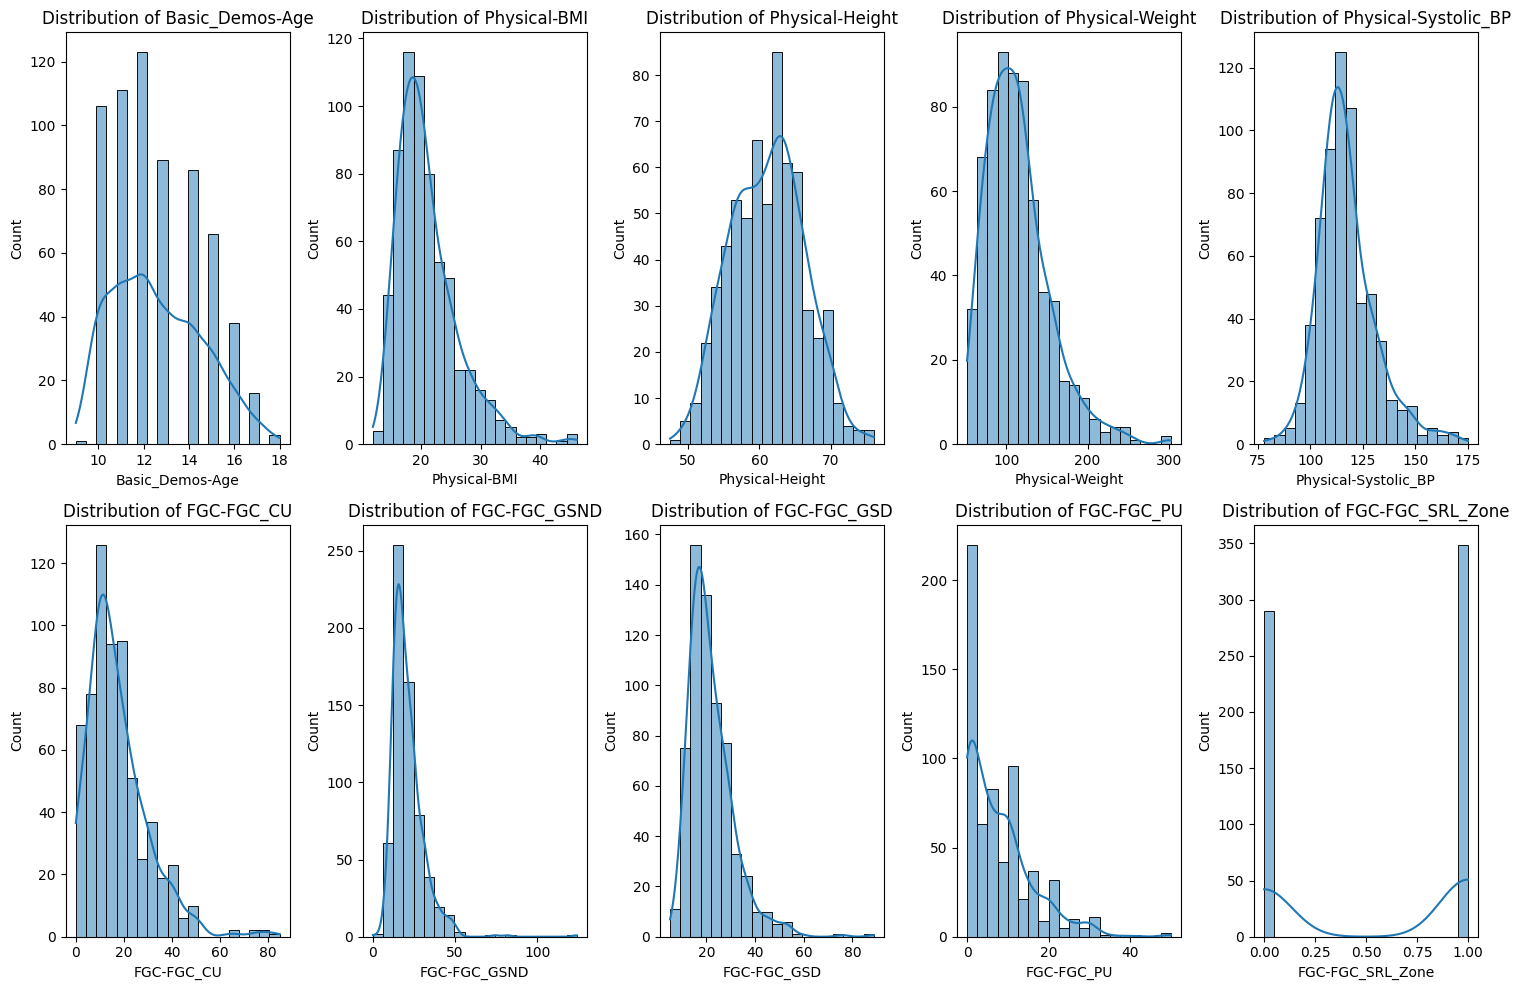

In [28]:
# Plotting the distribution for the numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols[:10], 1):
    plt.subplot(2, 5, i)
    sns.histplot(data[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

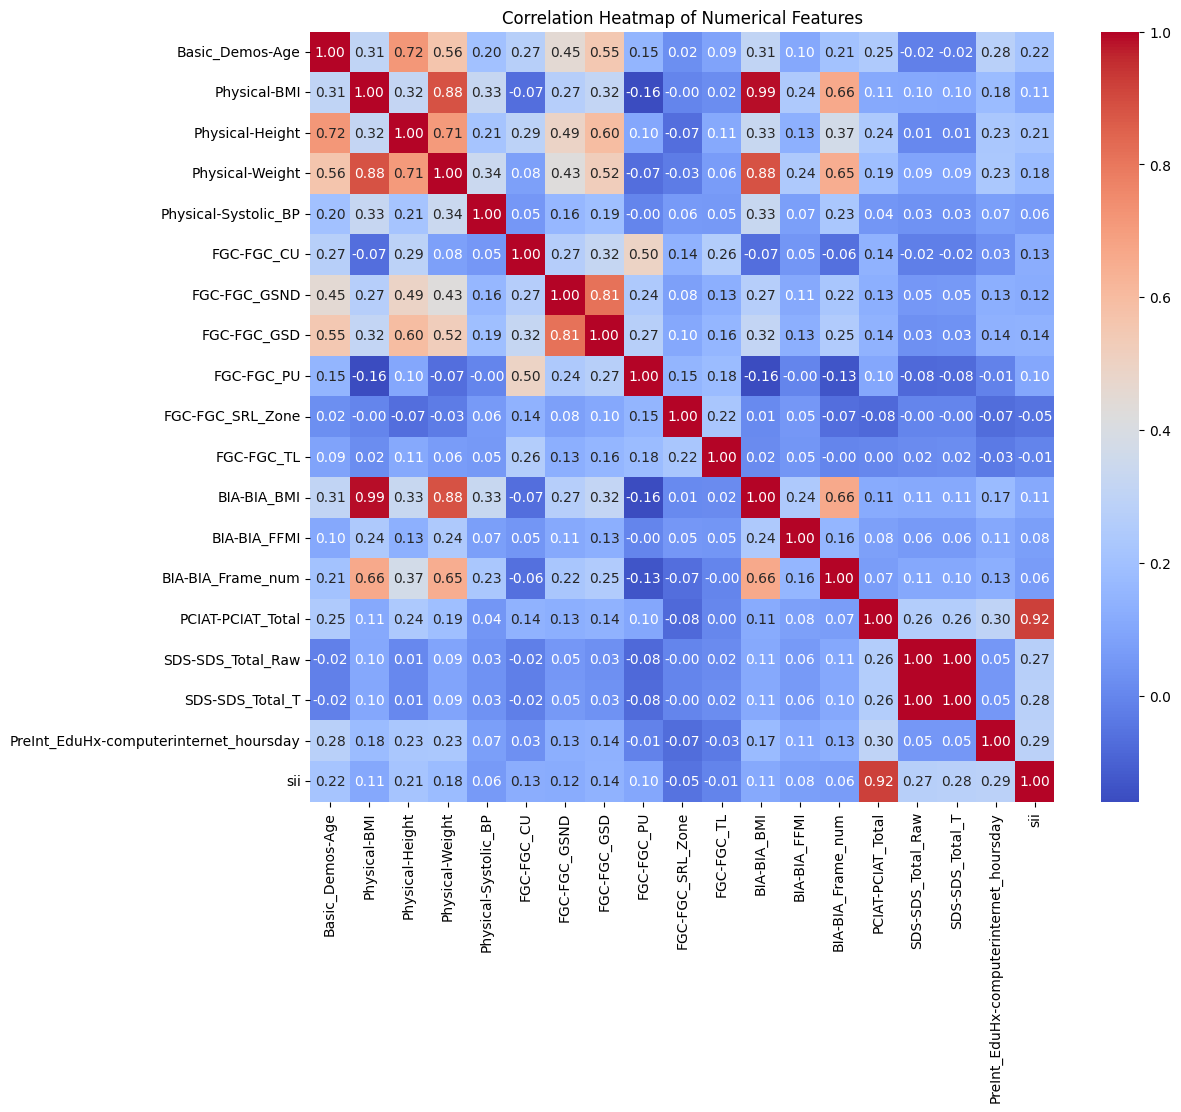

In [29]:
# Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [30]:
# Importing the libraries for model development and its evaluation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [31]:
categorical_cols = data.select_dtypes(include=['object']).columns
encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])

In [32]:
X = data.drop(columns=['sii', 'id'])
y = data['sii']

In [33]:
# Splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Training the Random Forest Classifier 

In [34]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

In [35]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
accuracy

0.9427083333333334

In [36]:
report

'              precision    recall  f1-score   support\n\n         0.0       1.00      1.00      1.00        77\n         1.0       0.91      1.00      0.95        58\n         2.0       0.90      0.90      0.90        50\n         3.0       1.00      0.14      0.25         7\n\n    accuracy                           0.94       192\n   macro avg       0.95      0.76      0.78       192\nweighted avg       0.95      0.94      0.93       192\n'

The Random Forest Classifier achieved an accuracy of 94.27% on the test dataset.
The model performs well overall, but struggles with class 3 due to the limited data points.

### Performing Hyperparameter Tuning through GridSearchCV

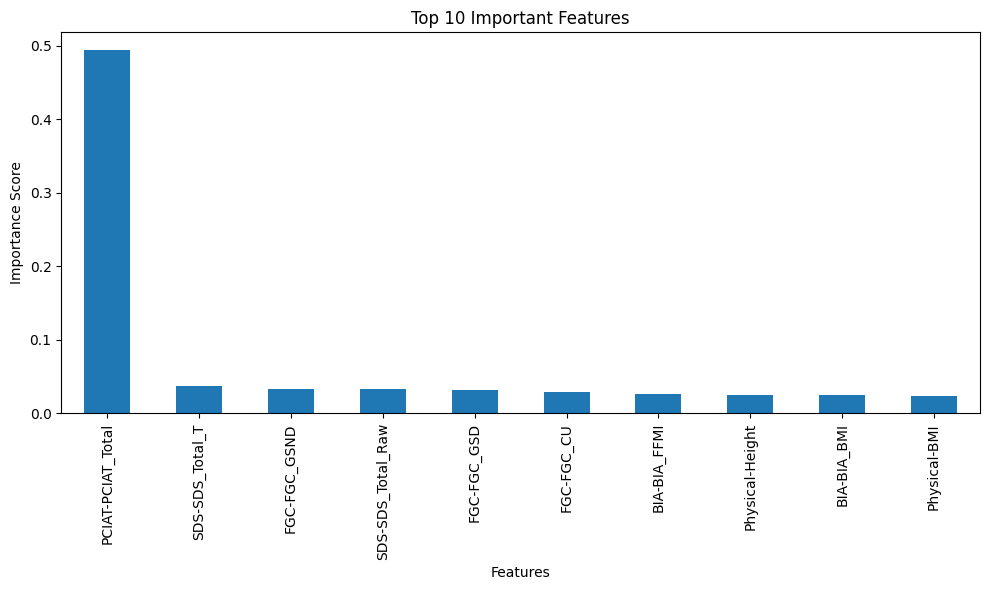

In [37]:
from sklearn.model_selection import GridSearchCV

# Feature Importance Analysis
features_importances = pd.Series(rf_clf.feature_importances_, index = X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
features_importances.head(10).plot(kind='bar')
plt.title('Top 10 Important Features')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.tight_layout()
plt.show()

In [38]:
# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator = RandomForestClassifier(random_state = 42),
    param_grid = param_grid,
    cv = 5,
    scoring = 'accuracy',
    n_jobs = -1
)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_params, best_score

({'max_depth': 10,
  'min_samples_leaf': 1,
  'min_samples_split': 5,
  'n_estimators': 200},
 0.9619225967540574)